Maximum Temperature 302.4
Minimum Temperature 291.73
                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2025-11-04 15:00:00        26.15        60        5.33     overcast clouds
2025-11-04 18:00:00        23.81        72        4.37     overcast clouds
2025-11-04 21:00:00        21.10        86        3.63       broken clouds
2025-11-05 00:00:00        20.63        87        2.63       broken clouds
2025-11-05 03:00:00        22.47        76        3.15     overcast clouds
2025-11-05 06:00:00        26.38        57        1.57     overcast clouds
2025-11-05 09:00:00        28.43        45        2.35     overcast clouds
2025-11-05 12:00:00        27.46        50        1.64     overcast clouds
2025-11-05 15:00:00        25.88        57        2.38     overcast clouds
2025-11-05 18:00:00        23.29        72        3.65          light rain
2025-11-05 21:00:00        23.26        71     

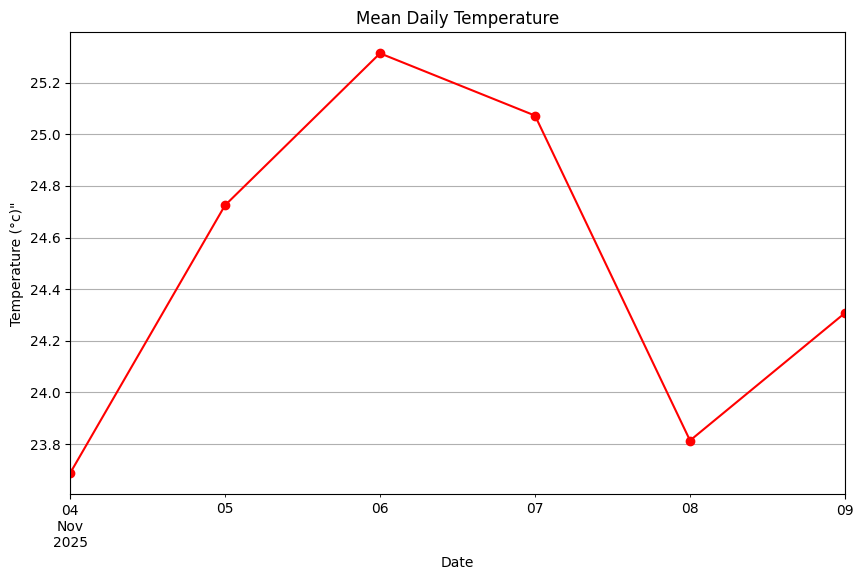

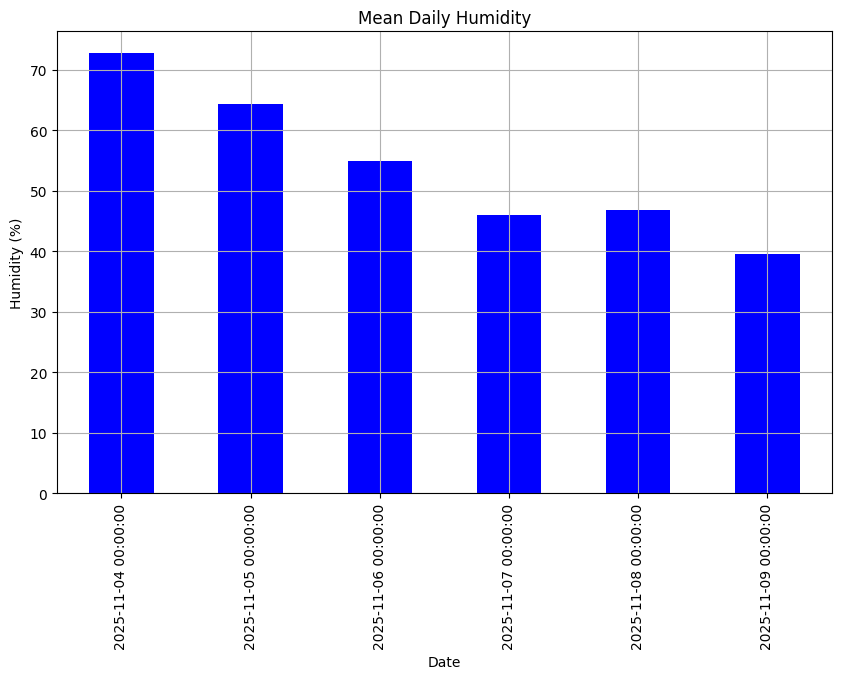

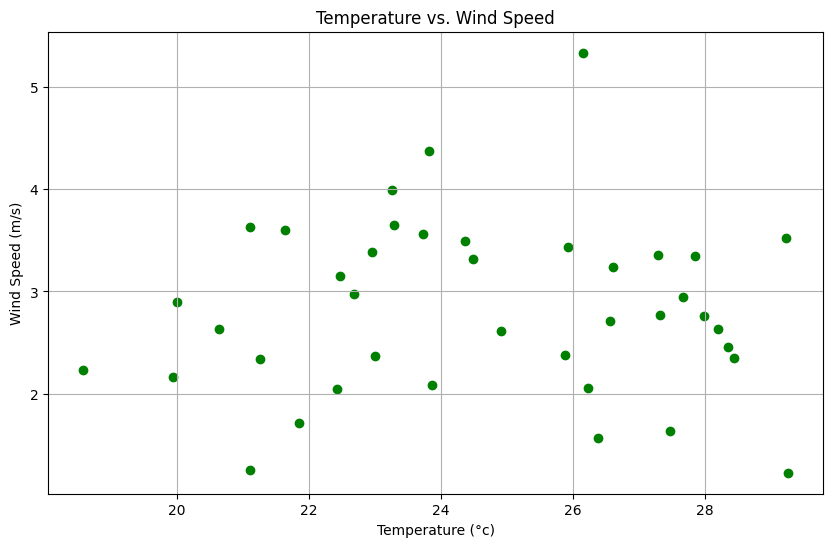

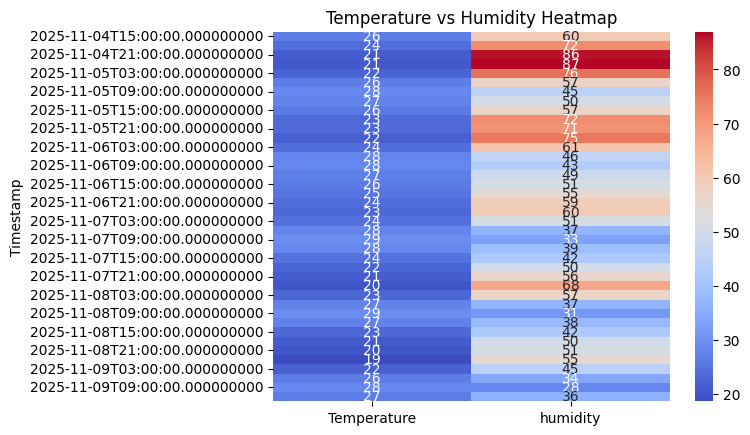

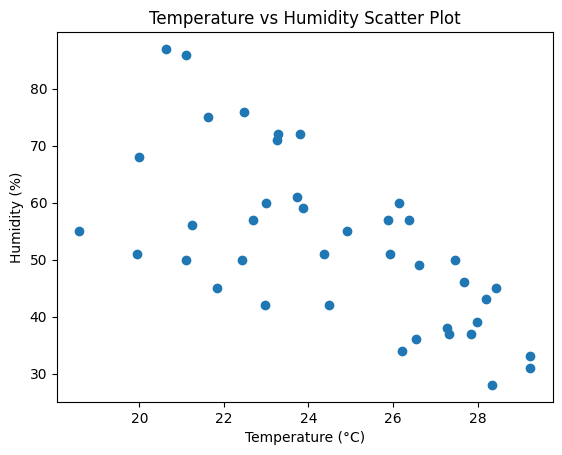

In [1]:
import requests
import pandas as pd
import datetime

# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e'

# Set the Location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764

# https://openweathermap.org/api/one-call-3
# How to use api call
# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

# Send a GET request to the API
response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len (weather_data['list'])
weather_data['list'][0]['weather'] [0] ['description']

# Getting the data from dictionary and taking into one variable
# Extract relevant weather attributes using List comprehension
temperatures = [item['main'] ['temp'] for item in weather_data['list']]
# It will extract all values (40) and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main'] ['temp'] for item in weather_data['list']]
humidity = [item['main'] ['humidity'] for item in weather_data['list']]
wind_speed= [item['wind'] ['speed'] for item in weather_data['list']]
weather_description = [item['weather'] [0] ['description'] for item in weather_data['list']]

# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({'Timestamp': timestamps,
 'Temperature': temperatures,
 'humidity': humidity,
 'wind_speed':wind_speed,
 'weather_description': weather_description})

# Set the Timestamp column as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)
max_temp = weather_df ['Temperature'].max()
print(f"Maximum Temperature {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature {min_temp}")

#Clean and preprocess the data # Handling missing values
weather_df.fillna(0, inplace=True) # Replace missing values with 0 or appropriate v

# Handling inconsistent format (if applicable)
# Convert temperature from Kelvin to Celsius
weather_df['Temperature'] = weather_df ['Temperature'].apply(lambda x: x - 273.15)

# Print the cleaned and preprocessed data print(weather_df)
print (weather_df)

import matplotlib.pyplot as plt
daily_mean_temp = weather_df ['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

#Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°c)"')
plt.grid(True)
plt.show()

#Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize =(10,6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°c)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

# Heatmap
import seaborn as sns
heatmap_data = weather_df [['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

#Create a scatter plot to visualize the relationship between temperature and humid
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()